# Linear programming
https://github.com/ibrahelsheikh/DSS-Lectures.git



In [3]:
!pip install pulp

Note: you may need to restart the kernel to use updated packages.


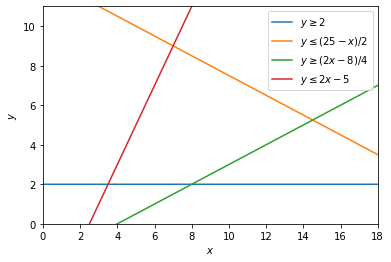

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pulp

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)  # start=0, stop=20, samples=2,000
# y >= 2
y1 = x * 0 + 2  # we need the "x" so that "y1" also become a vector!
# To graph we just calculate the equality (=)
# at this step, later we will "shade" the area
# included in the inequality (>=) later.
# 2y <= 25 - x
y2 = (25 - x) / 2.0
# 4y >= 2x - 8
y3 = (2 * x - 8) / 4.0
# y <= 2x - 5
y4 = 2 * x - 5
# Make plot
plt.plot(x, y1, label=r'$y\geq2$')  #for label in math text use
plt.plot(x, y2, label=r'$y\leq (25-x)/2$')  # r'$ $'
plt.plot(x, y3, label=r'$y\geq (2x - 8)/4$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 18))  #limits for plot x-axis, left=0, right=18
plt.ylim((0, 11))  #limits for plot y-axis, left=0, right=11
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper right')


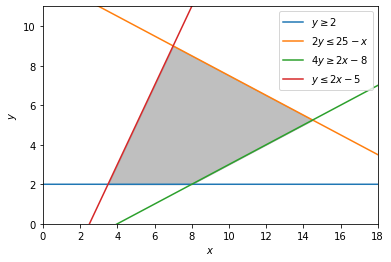

In [9]:

# Make plot
plt.plot(x, y1, label=r'$y\geq2$') #for label in math text use
plt.plot(x, y2, label=r'$2y\leq25-x$') # r'$ $'
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 18)) #limits for plot x-axis, left=0, right=18
plt.ylim((0, 11)) #limits for plot y-axis, left=0, right=11
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
# minimum of
# y <= (25 - x)/2
# y <= 2x - 5
y5 = np.minimum(y2, y4) #Compare two arrays and returns a new
#array containing the element-wise minima
# maximum of
# y >= 2
# y >= (2x - 8)/4
y6 = np.maximum(y1, y3) #Same as above, but return maxima
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.0, 1.0) ,loc='upper right' )


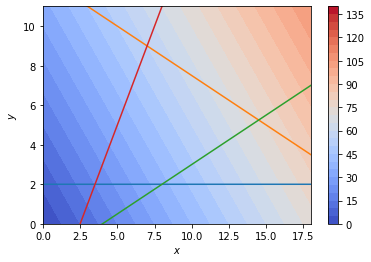

In [10]:

# Make plot
plt.plot(x, y1, label=r'$y\geq2$') #for label in math text use
plt.plot(x, y2, label=r'$2y\leq25-x$') # r'$ $'
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 18)) #limits for plot x-axis, left=0, right=18
plt.ylim((0, 11)) #limits for plot y-axis, left=0, right=11
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Z=4x+3y
def f(x, y):
 return 4*x + 3*y
x = np.linspace(0, 20, 2000)
y = np.linspace(0, 20, 2000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contourf(X, Y, Z, 30, cmap = 'coolwarm')
plt.colorbar();


In [14]:
# Create the 'prob' variable to contain the problem data
my_lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMaximize)